In [83]:
import pandas as pd
import numpy as np

# Loading data from each file
demand_data = pd.read_csv('/content/drive/MyDrive/monitor petrol/Demand_data.csv')
environmental_data = pd.read_csv('/content/drive/MyDrive/monitor petrol/environmental_monitoring_data.csv')
equipment_data = pd.read_csv('/content/drive/MyDrive/monitor petrol/equipment_performance_data.csv')
production_data = pd.read_csv('/content/drive/MyDrive/monitor petrol/prod_data.csv')
safety_data = pd.read_csv('/content/drive/MyDrive/monitor petrol/safety_incident_data.csv')

In [84]:
demand_data.shape

(736, 4)

In [85]:
environmental_data.shape


(500, 4)

In [86]:
equipment_data.shape

(250, 5)

In [87]:
production_data.shape

(740, 4)

In [88]:
safety_data.shape

(76, 5)

In [89]:
demand_data = demand_data.drop_duplicates()
production_data = production_data.drop_duplicates()
safety_data = safety_data.drop_duplicates()
environmental_data = environmental_data.drop_duplicates()
equipment_data = equipment_data.drop_duplicates()

In [90]:
demand_data.shape

(730, 4)

In [91]:
environmental_data.shape

(500, 4)

In [92]:
equipment_data.shape

(250, 5)

In [93]:
production_data.shape

(732, 4)

In [94]:
safety_data.shape

(76, 5)

In [95]:
for df, name in [(demand_data, "Demand"), (environmental_data, "Environmental"),
                 (equipment_data, "Equipment"), (production_data, "Production"),
                 (safety_data, "Safety")]:
    print(f"{name} Data Missing Values:\n{df.isnull().sum()}\n")

Demand Data Missing Values:
Date            0
Demand Level    0
Location        0
Product Type    0
dtype: int64

Environmental Data Missing Values:
Date                 0
Metric_Type          0
Metric_Value         0
Compliance_Status    0
dtype: int64

Equipment Data Missing Values:
Date                0
Equipment_ID        0
Health_Score        0
Downtime_Type       0
Utilization_Rate    0
dtype: int64

Production Data Missing Values:
Production Date      0
Production Level    12
Location             9
Product Type        10
dtype: int64

Safety Data Missing Values:
Date             0
Incident_Type    0
Severity         0
Root_Cause       0
Location         0
dtype: int64



In [96]:
# Ensure 'Production Level' is numeric
production_data['Production Level'] = pd.to_numeric(production_data['Production Level'], errors='coerce')

# Calculate IQR
Q1 = production_data['Production Level'].quantile(0.25)
Q3 = production_data['Production Level'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag outliers
production_data['Is_Outlier'] = (production_data['Production Level'] < lower_bound) | \
                                (production_data['Production Level'] > upper_bound)

In [97]:
mean_no_outliers = production_data.loc[~production_data['Is_Outlier'], 'Production Level'].mean()
production_data['Production Level'].fillna(mean_no_outliers, inplace=True)

<ipython-input-97-a4b5e7755b64>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  production_data['Production Level'].fillna(mean_no_outliers, inplace=True)


In [98]:
production_data.isna().sum()

,0
Production Date,0
Production Level,0
Location,9
Product Type,10
Is_Outlier,0


In [100]:
# Drop rows with any null values
production_data.dropna(inplace=True)


In [101]:
production_data.isna().sum()

,0
Production Date,0
Production Level,0
Location,0
Product Type,0
Is_Outlier,0


In [102]:
print(production_data.columns)

Index(['Production Date', 'Production Level', 'Location', 'Product Type',
       'Is_Outlier'],
      dtype='object')


In [103]:
print(production_data['Production Level'].describe())

count       713.000000
mean      16729.641885
std       28655.033864
min           0.000000
25%          13.896252
50%          60.752007
75%       25932.000000
max      150000.000000
Name: Production Level, dtype: float64


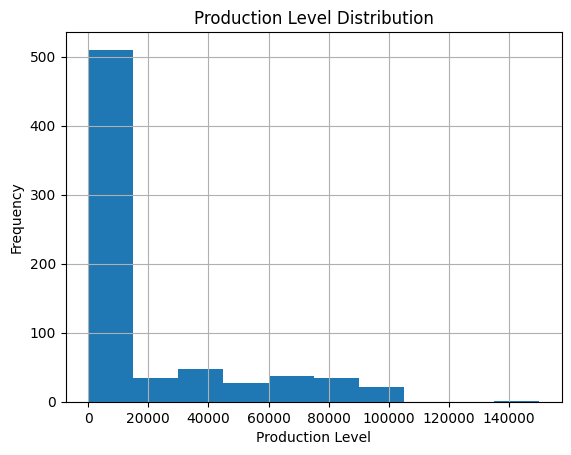

In [104]:
import matplotlib.pyplot as plt

production_data['Production Level'].hist()
plt.title('Production Level Distribution')
plt.xlabel('Production Level')
plt.ylabel('Frequency')
plt.show()

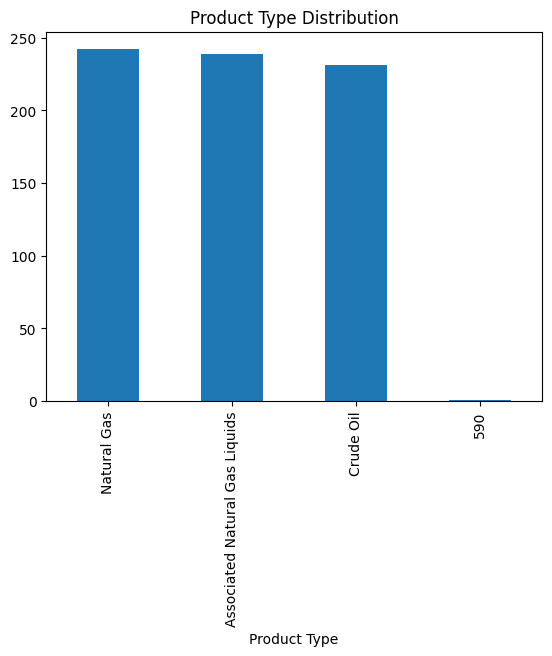

In [105]:
production_data['Product Type'].value_counts().plot(kind='bar')
plt.title('Product Type Distribution')
plt.show()


In [106]:
production_data.to_csv('cleaned_production_data.csv', index=False)
demand_data.to_csv('cleaned_demand_data.csv', index=False)
environmental_data.to_csv('cleaned_environmental_data.csv', index=False)
equipment_data.to_csv('cleaned_equipment_data.csv', index=False)
safety_data.to_csv('cleaned_safety_data.csv', index=False)

from google.colab import files
files.download('cleaned_demand_data.csv')
files.download('cleaned_environmental_data.csv')
files.download('cleaned_equipment_data.csv')
files.download('cleaned_safety_data.csv')
files.download('cleaned_production_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>